## Recommender System

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline  #This helps display Matplotlib-generated plots directly without the need to write plt.show()

In [2]:
#import dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep = '\t', names = column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Merging both data sets (data and Movie_Id_Titles) into 1 dataframe

In [6]:
df = pd.merge(df,movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [7]:
#Sorting by title and Rating
df.groupby('title').count()['rating'].sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
#Viewing the list of movies from highest rated to lowest rated
(df.groupby('title').mean())['rating'].sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [11]:
#Storing the mean value of rating of the movies in a separate dataframe
ratings = pd.DataFrame((df.groupby('title').mean())['rating'])
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [12]:
#Adding a new column to the ratings DataFrame which depicts the "number of people who rated the movie"
ratings['Number of Ratings'] = pd.DataFrame((df.groupby('title').count())['rating'])
ratings

,rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [14]:
#Sorting the dataframe according to number of ratings 
ratings.sort_values(by = 'Number of Ratings')

,rating,Number of Ratings
title,,
Á köldum klaka (Cold Fever) (1994),3.000000,1
Mille bolle blu (1993),1.000000,1
Mat' i syn (1997),1.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Man from Down Under, The (1943)",1.000000,1
...,...,...
Liar Liar (1997),3.156701,485
Return of the Jedi (1983),4.007890,507
Fargo (1996),4.155512,508


### Histogram showing number of ratings

<Axes: >

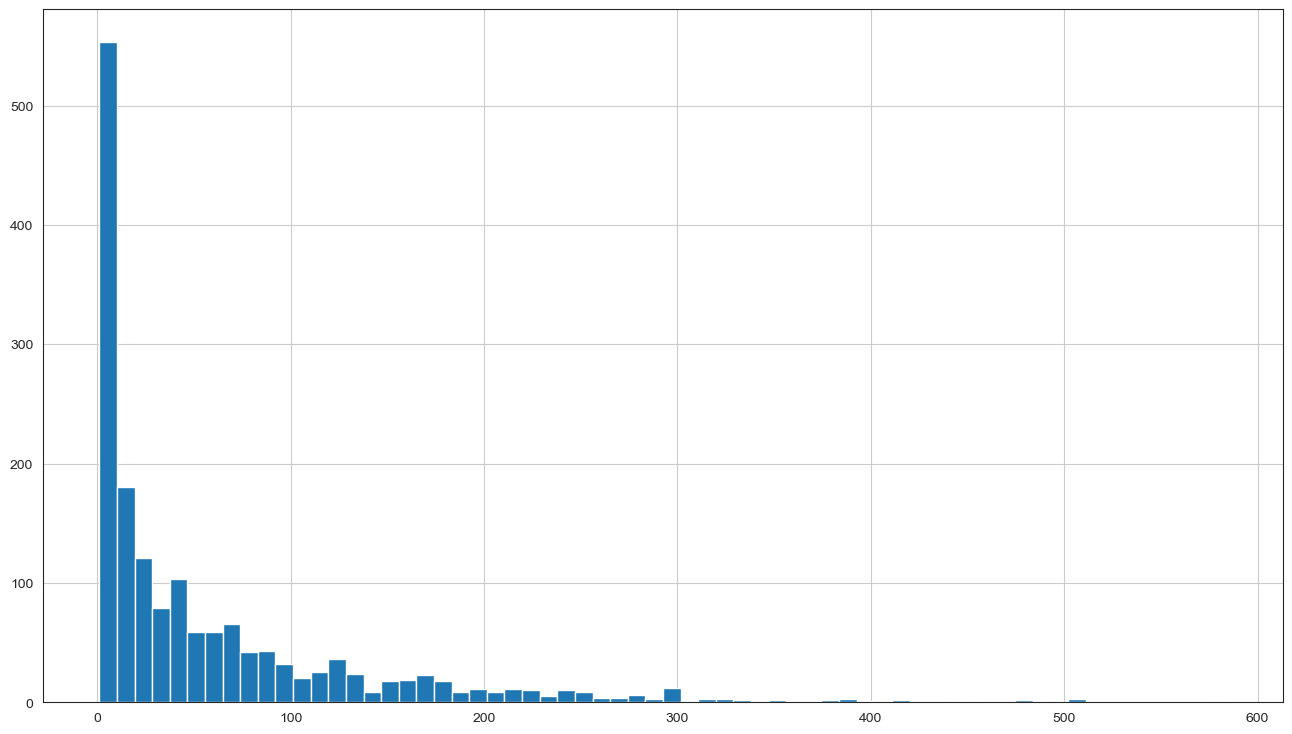

In [15]:
plt.figure(figsize= (16,9))
ratings['Number of Ratings'].hist(bins = 64)
#bins defines how many bars we can have in the histogram plot

<Axes: >

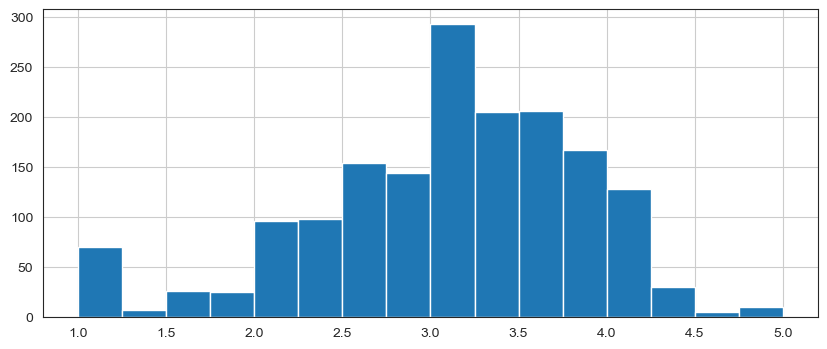

In [16]:
#Frequency distribution of Ratings given by the people
plt.figure(figsize= (10,4))
ratings['rating'].hist(bins = 16)

## Joint plot

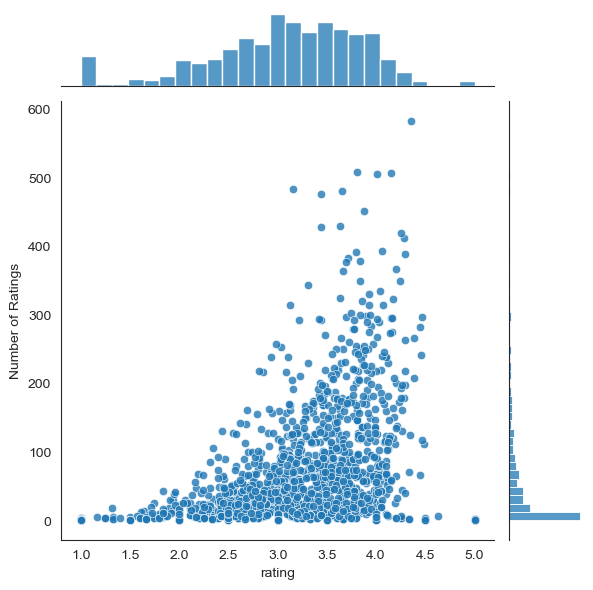

In [17]:
sns.jointplot(x = 'rating', y = 'Number of Ratings', data = ratings, alpha = 0.8)

# We can observe that movies which have more than 300 ratings, i.e, more than 300 people rated these movies after watching them,
# Generally have better ratings ( > 3.0 ). This is the benefit of plotting a jointplot.

## Data Pre Processing

In [18]:
# Table : User_id vs Title. (Rating give by user for that certain movie. 'NaN' if not watched)
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sorting the most rated movies

In [20]:
ratings.sort_values(by='Number of Ratings', ascending = False).head(10)

,rating,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [21]:
#Grabbing the ratings for a movie
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [22]:
#Grabbing the ratings for another movie
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

### Correlation b/w most rated movies

In [24]:
#For every column in the DataFrame, we computes the correlation with the Series "starwars_user_ratings". The result is a 
#Series where the index corresponds to the column names of the DataFrame, and the values represent the correlation coefficient 
#between that column and the Series .
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars.head(20)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
8 1/2 (1963)                                  -0.142977
8 Heads in a Duffel Bag (1997)                -0.577350
8 Seconds (1994)                              -0.755929
A Chef in Love (1996)                          0.868599
Above the Rim (1994)                          -0.645497
Absolute Power (1997)                          0.085440
Abyss, The (1989)                              0.203709
Ace Ventura: Pet Detective (1994)         

In [25]:
#Change the resulting series into a dataframe and drop the rows with value = NaN.
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


### Sorting the movies by correlation

In [26]:
corr_starwars.sort_values(by = 'Correlation', ascending = False).head(10)
#This will have some movies which are watched very less amount of times too. We need to filter such movies
# To do so , we will only consider movies which have more than 100 ratings and highest correlation values

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


##### Filtering out movies having less than 100 ratings

In [27]:
#Join the column 'Number of Ratings' from the ratings dataframe to current dataframe.
corr_starwars = corr_starwars.join(ratings['Number of Ratings'])
corr_starwars.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [28]:
#We will keep only those rows in our dataframe which have number of ratings more than 100.
corr_starwars[corr_starwars['Number of Ratings']>100].sort_values(by = 'Correlation', ascending = False).head(6)

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241


### For another movie

In [29]:
similar_to_liarliar = movie_matrix.corrwith(liarliar_user_ratings)
similar_to_liarliar.head()

D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [30]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])
corr_liarliar.dropna(inplace = True)
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [31]:
corr_liarliar.sort_values(by = 'Correlation', ascending = False).head(10)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [32]:
corr_liarliar = corr_liarliar.join(ratings['Number of Ratings'])
corr_liarliar

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [33]:
corr_liarliar[corr_liarliar['Number of Ratings'] > 100].sort_values(by = 'Correlation', ascending = False).head(6)

,Correlation,Number of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
